In [1]:
# Check scikit-learn version
import sklearn
# This is the version that will be used
print(sklearn.__version__)

0.23.1


In [2]:
from numpy import where
#from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib import pyplot


In [3]:
# X = brain[["gender", "age", "size"]]
# y = brain["weight"].values.reshape(-1, 1)
# print(X.shape, y.shape)

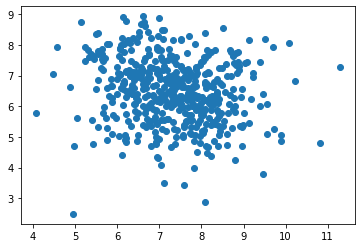

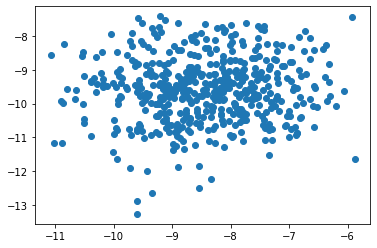

In [4]:
#Synthetic classification dataset
#Define Dataset
#X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
X, y = make_blobs(n_samples=1000, centers=2, n_features=4)
for class_value in range(2):
    #get row indexes for samples with this class
    row_ix = where(y == class_value)
    #Create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    #Show the plot
    pyplot.show()

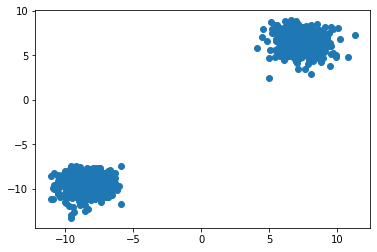

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

0.7916625231906551

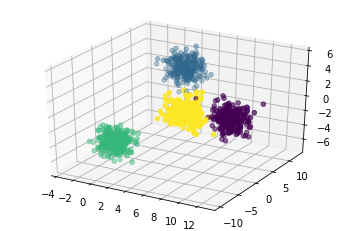

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=1000, centers=4, n_features=3)

km=KMeans(n_clusters=4)
km.fit(X)
labels=km.labels_

ax=plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
silhouette_score(X, labels)

2 clusters: 0.875426204057482
2 clusters: -2849.143524788747


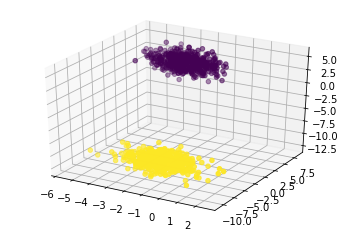

3 clusters: 0.5498976468012132
3 clusters: -2499.7273369975155


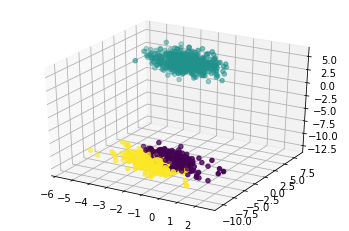

4 clusters: 0.22825807930729997
4 clusters: -2171.229091123517


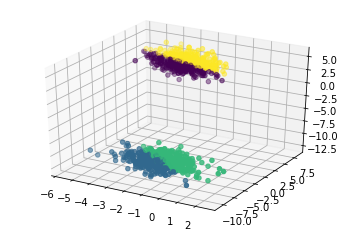

5 clusters: 0.22716565362825697
5 clusters: -1961.3149413626927


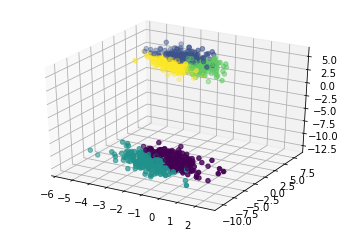

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=1000, centers=2, n_features=3)

guesses=[2, 3, 4, 5]
for each_guess in guesses: 
    km=KMeans(n_clusters=each_guess)
    km.fit(X)
    labels=km.labels_
    ax=plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
    print(f'{each_guess} clusters: {silhouette_score(X, labels)}')
    print(f'{each_guess} clusters: {km.score(X, labels)}')
    plt.show()

In [8]:
import pandas as pd
df=pd.read_csv('Data/combined_data.csv')
df=df.drop(columns=['Unnamed: 0'], axis=1)

In [9]:
df.corr().style.background_gradient()
# Data normalization: sci-kit learn

,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Happiness (Dystopia),Beer_Servings,Spirit_Servings,Wine_Servings,Total_L_Pure_Alcohol,Life_Expectancy (LED),Adult_Mortality,infantdeaths,GDP_Health_Gov_Expenditure (%),HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling
Happiness_Score,1.000000,0.775445,0.764109,0.771219,0.592499,0.065331,-0.419593,0.000000,0.538061,0.341646,0.536227,0.489242,0.742036,-0.569297,-0.246324,-0.080572,0.223995,-0.165692,0.464924,-0.253973,0.399783,0.362245,-0.475136,0.455381,-0.006814,-0.558550,-0.544194,0.761802,0.701895
GDP,0.775445,1.000000,0.782250,0.851443,0.423071,-0.122246,-0.335573,0.000000,0.546706,0.395111,0.547392,0.526634,0.824718,-0.624344,-0.205920,-0.010646,0.283664,-0.070264,0.579350,-0.223760,0.489651,0.416380,-0.430658,0.487710,0.018256,-0.499835,-0.494329,0.897898,0.793026
Social_Support,0.764109,0.782250,1.000000,0.746707,0.482677,-0.054286,-0.212337,0.000000,0.558448,0.459249,0.452101,0.518413,0.719766,-0.515775,-0.285906,-0.128867,0.256557,-0.134792,0.490300,-0.294968,0.411815,0.367047,-0.379339,0.396696,-0.005451,-0.565577,-0.551332,0.775145,0.699281
Life_Expectancy (Happiness),0.771219,0.851443,0.746707,1.000000,0.453230,-0.073388,-0.354834,-0.000000,0.472122,0.402451,0.540932,0.460289,0.945392,-0.769190,-0.264703,0.027118,0.385094,-0.076902,0.529175,-0.292047,0.532040,0.494070,-0.620344,0.452783,-0.064756,-0.546692,-0.542649,0.862449,0.790146
Freedom_Score,0.592499,0.423071,0.482677,0.453230,1.000000,0.251895,-0.421152,-0.000000,0.254851,0.090193,0.234728,0.197718,0.404540,-0.216020,-0.003773,-0.049933,0.189746,0.081127,0.095647,-0.016197,0.275055,0.289519,-0.206215,0.271877,0.007127,-0.244938,-0.222294,0.418739,0.369642
Generosity,0.065331,-0.122246,-0.054286,-0.073388,0.251895,1.000000,-0.276100,-0.000000,-0.251523,-0.131114,-0.072209,-0.173405,-0.110892,0.023829,0.086731,-0.022373,-0.011258,0.073776,-0.160737,0.089885,-0.139478,-0.018542,-0.016582,0.079798,0.211263,0.135642,0.129272,-0.147918,-0.138848
Corruption_Score,-0.419593,-0.335573,-0.212337,-0.354834,-0.421152,-0.276100,1.000000,0.000000,-0.141854,0.042956,-0.328477,-0.208367,-0.314497,0.247546,0.082104,0.092506,-0.127693,0.068507,-0.218117,0.087555,-0.220425,-0.186334,0.149487,-0.343396,0.064316,0.183507,0.182640,-0.321081,-0.319420
Happiness (Dystopia),0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000
Beer_Servings,0.538061,0.546706,0.558448,0.472122,0.254851,-0.251523,-0.141854,-0.000000,1.000000,0.474127,0.546176,0.833575,0.474494,-0.228156,-0.213633,-0.034896,0.009203,-0.143041,0.331914,-0.220184,0.258505,0.133119,-0.131182,0.332001,-0.055168,-0.499008,-0.495869,0.574425,0.599165
Spirit_Servings,0.341646,0.395111,0.459249,0.402451,0.090193,-0.131114,0.042956,-0.000000,0.474127,1.000000,0.232426,0.635453,0.385029,-0.270927,-0.123839,0.038891,-0.005048,0.050817,0.340107,-0.141172,0.238345,0.063307,-0.295087,0.130578,-0.144158,-0.426575,-0.394778,0.444423,0.404055


In [16]:
# Happiness shouldn't go into the clusters, because we are trying to find subpopulations of happiness
columns_int=['Schooling', 'Social_Support']
X=df[columns_int[:3]].dropna()
len(X)

155

In [17]:
X

,Schooling,Happiness_Score,Social_Support
0,17.0,7.8087,0.954330
1,19.2,7.6456,0.955991
2,16.0,7.5599,0.942847
3,19.0,7.5045,0.974670
4,17.7,7.4880,0.952487
...,...,...,...
150,7.1,3.4759,0.319460
151,10.8,3.3123,0.540835
152,10.3,3.2992,0.763093
153,4.9,2.8166,0.553707


Index(['Schooling', 'Happiness_Score', 'Social_Support'], dtype='object')
2 clusters: 0.49778551582390596
2 clusters: -590.2871318382031


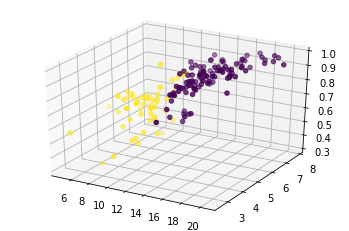

Index(['Schooling', 'Happiness_Score', 'Social_Support'], dtype='object')
3 clusters: 0.47645956226391545
3 clusters: -316.1812766886909


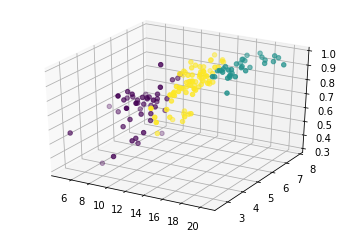

Index(['Schooling', 'Happiness_Score', 'Social_Support'], dtype='object')
4 clusters: 0.42839434879379024
4 clusters: -237.46015437616578


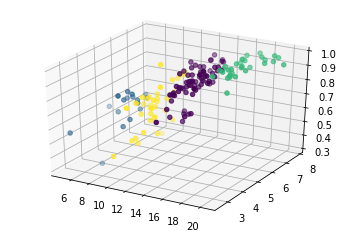

Index(['Schooling', 'Happiness_Score', 'Social_Support'], dtype='object')
5 clusters: 0.3943131957219917
5 clusters: -183.867200477654


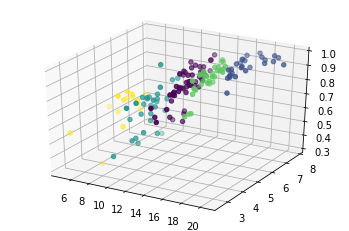

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
# X=df[np.random.choice(columns_int, replace=False, size=3)].dropna()
X=df[columns_int].dropna()
guess_list=[2, 3, 4, 5]
for each_guess in guess_list: 
    km=KMeans(n_clusters=each_guess)
    km.fit(X)
    labels=km.labels_
    ax=plt.axes(projection='3d')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels)
    print(f'{X.columns}')
    print(f'{each_guess} clusters: {silhouette_score(X, labels)}')
    print(f'{each_guess} clusters: {km.score(X, labels)}')
    plt.show()
    
    
# Color the countries by happiness score, so you can see if the different clusters have trends in happiness scores.
# Ex. if you have 3 clusters and you color by happiness, and the average happiness is the same across each cluster, 
#     conclusion is that they aren't good predictors of happiness. 
# Clustering is for noticing trends, not predicting. Can be driven by a hypothesis that will lead to prediction.